<a href="https://colab.research.google.com/github/mewadashreya/Google_Play_Ratings_Analytics/blob/main/GooglePlay_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install chart_studio

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')

In [ ]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
type(data_df)

pandas.core.frame.DataFrame

In [ ]:
data_df.shape

(10841, 13)

In [ ]:
data_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


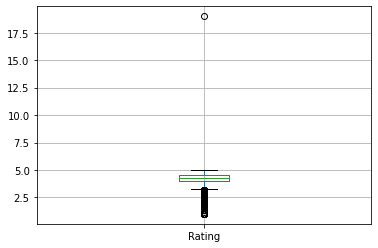

In [ ]:
data_df.boxplot()

In [ ]:
fig = px.box(data_df,y="Rating")
fig.show()

In [ ]:
fig = px.histogram(data_df,x="Rating")
fig.show()    #The data is right skewed!

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data_df[data_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data_df.drop([10472],inplace=True)

In [ ]:
data_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [ ]:
fig = px.box(data_df,y="Rating")
fig.show()

In [ ]:
fig = px.histogram(data_df,x="Rating")
fig.show()

https://geosim.cs.vt.edu/Sable/converted/MMM/activity.html

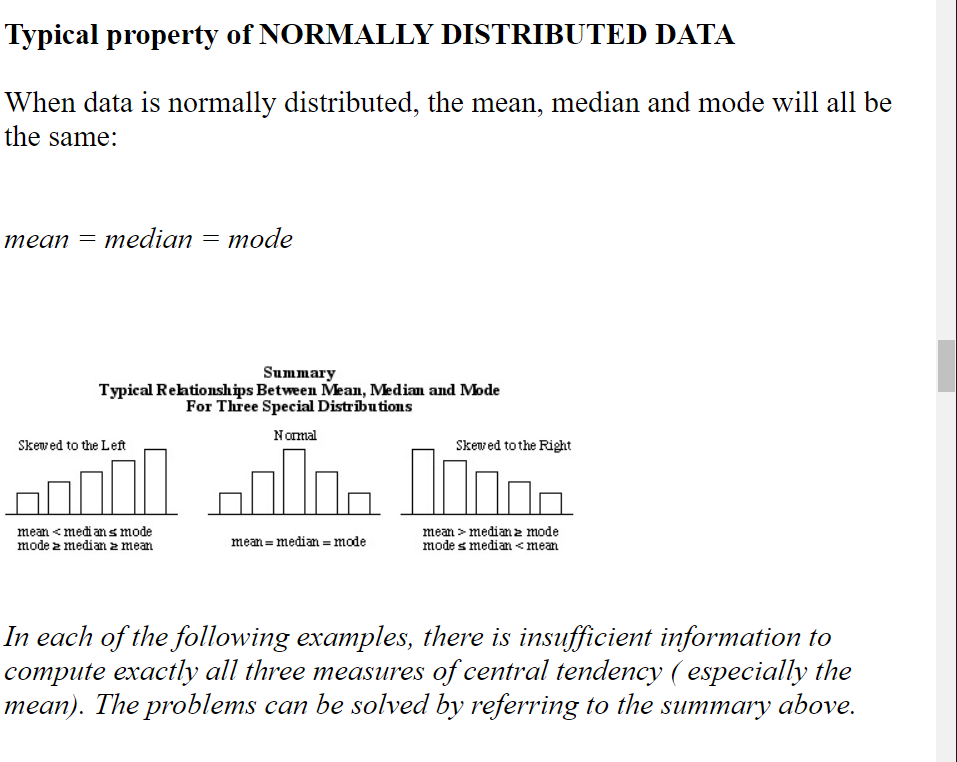

In [ ]:
threshold = len(data_df)*0.1
threshold

1084.0

In [ ]:
data_df.dropna(thresh=threshold,axis=1,inplace=True)

In [ ]:
print(data_df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
def input_median(series):
  return series.fillna(series.median())

In [ ]:
data_df.Rating = data_df['Rating'].transform(input_median)

In [ ]:
data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
data_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
data_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
data_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
#categorical values : modes
print(data_df['Type'].mode())
print(data_df['Current Ver'].mode())
print(data_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
data_df['Type'].fillna(str(data_df['Type'].mode().values[0]),inplace = True)
data_df['Current Ver'].fillna(str(data_df['Current Ver'].mode().values[0]),inplace = True)

In [ ]:
data_df['Android Ver'].fillna(str(data_df['Android Ver'].mode().values[0]),inplace = True)

In [ ]:
data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data_df['Price'] = data_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
data_df['Price'] = data_df['Price'].apply(lambda x : float(x))
data_df['Reviews'] = pd.to_numeric(data_df['Reviews'],errors='coerce')


In [ ]:
#data_df["Review Length"]= data_df["Reviews"].astype(str).str.len()

In [ ]:
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#data_df.drop(['Review Length'],inplace=True,axis=1)

In [ ]:
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
data_df['Installs'] = data_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
data_df['Installs'] = data_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))

In [ ]:
data_df['Installs'] = data_df['Installs'].astype(float).apply(lambda x : float(x))

In [ ]:

data_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
data_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
grp = data_df.groupby('Category',as_index=False).agg({"Rating":"mean"})


In [ ]:
grp

,Category,Rating
0,ART_AND_DESIGN,4.355385
1,AUTO_AND_VEHICLES,4.205882
2,BEAUTY,4.283019
3,BOOKS_AND_REFERENCE,4.335498
4,BUSINESS,4.182391
5,COMICS,4.160000
6,COMMUNICATION,4.180103
7,DATING,4.025641
8,EDUCATION,4.388462
9,ENTERTAINMENT,4.126174


In [ ]:
grp = grp.reset_index(drop=True)

In [ ]:
grp

,Category,Rating
0,ART_AND_DESIGN,4.355385
1,AUTO_AND_VEHICLES,4.205882
2,BEAUTY,4.283019
3,BOOKS_AND_REFERENCE,4.335498
4,BUSINESS,4.182391
5,COMICS,4.160000
6,COMMUNICATION,4.180103
7,DATING,4.025641
8,EDUCATION,4.388462
9,ENTERTAINMENT,4.126174


In [ ]:
fig = go.Figure(
    data=[go.Bar(x=grp.Category,y=grp['Rating'])],
        layout_title_text="Rating mean"
)
fig.show()



In [ ]:
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

In [ ]:
grp_reviews_sum = data_df.groupby('Category',as_index=False).agg({"Reviews":"mean"})
grp_price_sum = data_df.groupby('Category',as_index=False).agg({"Price":"sum"})


In [ ]:
print(grp_price_sum)

               Category    Price
0        ART_AND_DESIGN     5.97
1     AUTO_AND_VEHICLES    13.47
2                BEAUTY     0.00
3   BOOKS_AND_REFERENCE   119.77
4              BUSINESS   185.27
5                COMICS     0.00
6         COMMUNICATION    83.14
7                DATING    31.43
8             EDUCATION    17.96
9         ENTERTAINMENT     7.98
10               EVENTS   109.99
11               FAMILY  2434.78
12              FINANCE  2900.83
13       FOOD_AND_DRINK     8.48
14                 GAME   287.30
15   HEALTH_AND_FITNESS    67.34
16       HOUSE_AND_HOME     0.00
17   LIBRARIES_AND_DEMO     0.99
18            LIFESTYLE  2360.87
19  MAPS_AND_NAVIGATION    26.95
20              MEDICAL  1439.96
21   NEWS_AND_MAGAZINES     3.98
22            PARENTING     9.58
23      PERSONALIZATION   153.96
24          PHOTOGRAPHY   134.21
25         PRODUCTIVITY   250.93
26             SHOPPING     5.48
27               SOCIAL    15.97
28               SPORTS   100.00
29        

In [ ]:
fig = go.Figure(
    data=[go.Line(x=grp_price_sum.Category,y=grp_price_sum['Price'])],
        layout_title_text="Rating mean"
)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure(
    data=[go.Bar(x=grp_reviews_sum.Category,y=grp_reviews_sum['Reviews'])],
        layout_title_text="Rating mean"
)
fig.show()


In [ ]:
grp_reviews_sum = data_df.groupby('Category',as_index=False).agg({"Reviews":"mean"})


In [ ]:
grp_reviews_sum = data_df.groupby('Category',as_index=False).agg({"Reviews":"mean"})


In [ ]:
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go